In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
balldata=pd.read_csv('dummy/Ball_by_Ball.csv')
print(len(balldata))
print(balldata.head(1))

136590
   Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0    335987           1        1        1                1                2   

   Striker_Id  Striker_Batting_Position  Non_Striker_Id  Bowler_Id  \
0           1                         1               2         14   

  Batsman_Scored Extra_Type Extra_Runs Player_dissimal_Id Dissimal_Type  \
0              0    legbyes          1                                    

  Fielder_Id  
0             


In [7]:
bowlers=balldata['Bowler_Id'].unique()
print(len(bowlers))

331


In [8]:
balldata=balldata[balldata.Dissimal_Type!=' ']
balldata=balldata[balldata.Dissimal_Type!='run out']
balldata=balldata[balldata.Dissimal_Type!='retired hurt']
print('Total Wickets Taken '+str(len(balldata)))

Total Wickets Taken 4941


In [9]:
player_data=pd.read_csv('dummy/Player.csv')
print(player_data.head(2))

   Player_Id  Player_Name        DOB Batting_Hand     Bowling_Skill  \
0          1   SC Ganguly   8-Jul-72    Left_Hand  Right-arm medium   
1          2  BB McCullum  27-Sep-81   Right_Hand  Right-arm medium   

       Country  Is_Umpire  Unnamed: 7  
0        India          0         NaN  
1  New Zealand          0         NaN  


## Maximum Wickets.

In [10]:
wickets=balldata.groupby(['Bowler_Id'])
wickets_taken=[]
baller_id=[]
for i, j in wickets:
    wickets_taken.append([i,len(j['Dissimal_Type'])])

wickets_records=pd.DataFrame(wickets_taken,columns=['Player_Id','Wickets_Taken'])
bowler_record=pd.merge(wickets_records,player_data,on='Player_Id',how='left')
print('Wickets Records by Maximum Wickets')
bowler_record.sort_values(by='Wickets_Taken',kind='mergesort',ascending=False).head(1)


Wickets Records by Maximum Wickets


,Player_Id,Wickets_Taken,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
121,194,120,SL Malinga,28-Aug-83,Right_Hand,Right-arm fast,Sri Lanka,0,NaN


## Maximum Runs..

In [12]:
newdata=pd.read_csv('dummy/Ball_by_Ball.csv')
newdata=newdata[newdata.Batsman_Scored!='Do_nothing']
newdata=newdata[newdata.Batsman_Scored!='0']
newdata=newdata[newdata.Batsman_Scored!=' ']
scores=newdata.groupby('Striker_Id')
scored=[]
for i,j in scores:
    scored.append((i,np.sum(np.array(j['Batsman_Scored'],dtype=int))))
    #scored.append((i,j['Batsman_Scored'].sum())) This is Returning the list of String instead of adding the numbers.
    
score_record=pd.DataFrame(scored,columns=['Player_Id','Total Scores'])
print('ScoreCard With Maximum Scores')
scorecard=pd.merge(score_record,player_data,on='Player_Id',how='left')
scorecard.sort_values(by='Total Scores',kind='mergeort',ascending=False).head(1)

ScoreCard With Maximum Scores


,Player_Id,Total Scores,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
20,21,4106,SK Raina,27-Nov-86,Left_Hand,Right-arm offbreak,India,0,NaN


## Maximum Sixers.

In [13]:
sixdata=newdata[newdata.Batsman_Scored=='6']
sixers=sixdata.groupby('Striker_Id')
sixers_hit=[]
for i,j in sixers:
    sixers_hit.append((i,len(j.Batsman_Scored)))
sixers_record=pd.DataFrame(sixers_hit,columns=['Player_Id','Total Sixers'])
print('Maximum Sixers..')
sixercard=pd.merge(sixers_record,player_data,on='Player_Id',how='left')
sixercard.sort_values(by='Total Sixers',kind='mergeort',ascending=False).head(1)

Maximum Sixers..


,Player_Id,Total Sixers,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
121,162,252,CH Gayle,21-Sep-79,Left_Hand,Right-arm offbreak,West Indies,0,NaN


## Maximum Four's

In [14]:
fourdata=newdata[newdata.Batsman_Scored=='4']
fours=fourdata.groupby('Striker_Id')
fours_hit=[]
for i,j in fours:
    fours_hit.append((i,len(j.Batsman_Scored)))
fours_record=pd.DataFrame(fours_hit,columns=['Player_Id','Total Fours'])
print('Maximum Fours..')
fourscard=pd.merge(fours_record,player_data,on='Player_Id',how='left')
fourscard.sort_values(by='Total Fours',kind='mergeort',ascending=False).head(1)

Maximum Fours..


,Player_Id,Total Fours,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
37,40,422,G Gambhir,14-Oct-81,Left_Hand,Legbreak,India,0,NaN


## Matches in Each Stadium

In [15]:
matchdata=pd.read_csv('dummy/Match.csv')
print(matchdata.head(1))

   Match_Id Match_Date  Team_Name_Id  Opponent_Team_Id  Season_Id  \
0    335987  18-Apr-08             2                 1          1   

              Venue_Name  Toss_Winner_Id Toss_Decision  IS_Superover  \
0  M Chinnaswamy Stadium               2         field             0   

   IS_Result  Is_DuckWorthLewis Win_Type  Won_By  Match_Winner_Id  \
0          1                  0  by runs   140.0              1.0   

   Man_Of_The_Match_Id  First_Umpire_Id  Second_Umpire_Id  City_Name  \
0                  2.0              470               477  Bangalore   

  Host_Country  
0        India  


In [16]:
f=matchdata.groupby('Venue_Name')
matchrecord=[]
for i,j in f:
    matchrecord.append((i,len(j.Match_Id)))
final=pd.DataFrame(matchrecord,columns=['Venue','Total_Matches'])
final.sort_values(by='Total_Matches',kind='mergesort',ascending=False).head(3)


,Venue,Total_Matches
14,M Chinnaswamy Stadium,58
7,Eden Gardens,54
8,Feroz Shah Kotla,53


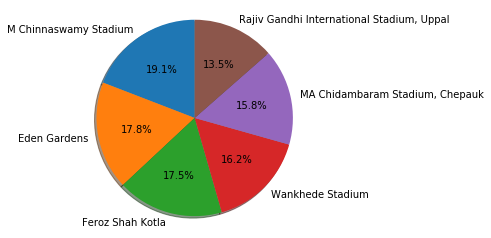

In [17]:
matchrecord=sorted(matchrecord, key=lambda x:x[1],reverse=True)
labels=[]
sizes=[]
for i in range(6):
    labels.append(matchrecord[i][0])
    sizes.append(matchrecord[i][1])
fig1,ax1=plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## SeasonWise Winners

In [18]:
seasonwisefilter=matchdata.groupby('Season_Id')
seasonwiserecord=[]
temp=0
for i, j in seasonwisefilter:
    temp+=len(j.Match_Winner_Id)
    seasonWinner=j.loc[temp-1:temp-1:,'Match_Winner_Id'].values[0]
    #print(seasonWinner)
    #print(temp," ",seasonWinner)
    seasonwiserecord.append((i,seasonWinner))
winners=pd.DataFrame(seasonwiserecord,columns=['Season_Id','Team_Id'])
pd.DataFrame(seasonwiserecord,columns=['Season_Id','Team_Id'])


,Season_Id,Team_Id
0,1,5.0
1,2,8.0
2,3,3.0
3,4,3.0
4,5,1.0
5,6,7.0
6,7,1.0
7,8,7.0
8,9,11.0


In [19]:
teamdata=pd.read_csv('dummy/Team.csv')
teamdata.head(2)

,Team_Id,Team_Name,Team_Short_Code
0,1,Kolkata Knight Riders,KKR
1,2,Royal Challengers Bangalore,RCB


In [20]:
pd.merge(winners,teamdata,on='Team_Id',how='left')

,Season_Id,Team_Id,Team_Name,Team_Short_Code
0,1,5.0,Rajasthan Royals,RR
1,2,8.0,Deccan Chargers,DC
2,3,3.0,Chennai Super Kings,CSK
3,4,3.0,Chennai Super Kings,CSK
4,5,1.0,Kolkata Knight Riders,KKR
5,6,7.0,Mumbai Indians,MI
6,7,1.0,Kolkata Knight Riders,KKR
7,8,7.0,Mumbai Indians,MI
8,9,11.0,Sunrisers Hyderabad,SRH


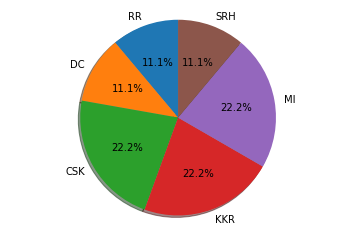

In [21]:
temp=pd.merge(winners,teamdata,on='Team_Id',how='left')
labels=temp.Team_Short_Code.unique()
sizes=[1,1,2,2,2,1]
fig2,ax2=plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
plt.show()

## Man of The Match Analysis

In [33]:
matchwisefilter=matchdata.groupby(['Match_Id'])
manofthematch=[]
for i, j in matchwisefilter:
    manofthematch.append([j.Season_Id.values[0],j.Match_Id.values[0],j.Man_Of_The_Match_Id.values[0]])
#print(manofthematch)
data=pd.DataFrame(manofthematch,columns=['Season_Id','Match_Id','Player_Id'])  
pd.DataFrame(manofthematch,columns=['Season_Id','Match_Id','Player_Id']).head(5)


,Season_Id,Match_Id,Player_Id
0,1,335987,2.0
1,1,335988,19.0
2,1,335989,90.0
3,1,335990,11.0
4,1,335991,4.0


In [32]:
pd.merge(data,player_data,on='Player_Id',how='inner').head(5)

,Season_Id,Match_Id,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
0,1,335987,2.0,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN
1,4,501215,2.0,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN
2,4,501220,2.0,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN
3,8,829716,2.0,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN
4,8,829758,2.0,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN


### Man of The Match in Each Season

In [69]:
from collections import Counter
grouped=pd.merge(data,player_data,on='Player_Id',how='inner')
seasonwised=grouped.groupby('Season_Id')
manofthematchcount=[]
d=[]
s=1
for i,j in seasonwised:
    temp=dict(Counter(j.Player_Name))
    k=list(temp.keys())
    v=list(temp.values())
    for t in range(len(k)):
        d.append((s,k[t],v[t]))
    s+=1
countFrame=pd.DataFrame(d,columns=['Season_Id','Player_Name','Man_Of_The_Match_Count'])
countFrame.sort_values(by=['Season_Id','Man_Of_The_Match_Count'],kind='mergesort',ascending=False).head(5)

,Season_Id,Player_Name,Man_Of_The_Match_Count
365,9,V Kohli,5
359,9,AB de Villiers,4
361,9,RG Sharma,4
364,9,DA Warner,3
368,9,AJ Finch,3


In [84]:
lf=[]
def findm(seasonid):
    newd=countFrame[countFrame.Season_Id==seasonid]
    t=newd.sort_values(by=['Man_Of_The_Match_Count'],kind='mergesort',ascending=False).head(1)
    lf.append((t.Season_Id.values[0],t.Player_Name.values[0],t.Man_Of_The_Match_Count.values[0]))

### Maximum Man of the Match Title in Each Season

In [85]:
for i in range(1,10):
    findm(i)
pd.DataFrame(lf,columns=['Season_Id','Player_Name','Man_Of_The_Match_Count'])

,Season_Id,Player_Name,Man_Of_The_Match_Count
0,1,SE Marsh,5
1,2,YK Pathan,3
2,3,SR Tendulkar,4
3,4,CH Gayle,6
4,5,CH Gayle,5
5,6,MEK Hussey,5
6,7,GJ Maxwell,4
7,8,DA Warner,4
8,9,V Kohli,5
